<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/applepomm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [3]:
path = Path("/content/sample_data")
print(path)
for file, folder in [('apple.csv', 'apple'), ('pom.csv', 'pomm')
                    ]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

/content/sample_data


In [4]:
for folder in ('apple', 'pomm'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

apple


pomm


In [21]:
pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 18kB/s 
     |████████████████████████████████| 4.0MB 44.3MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [6]:
data.classes

['apple', 'pomm', 'sample_data']

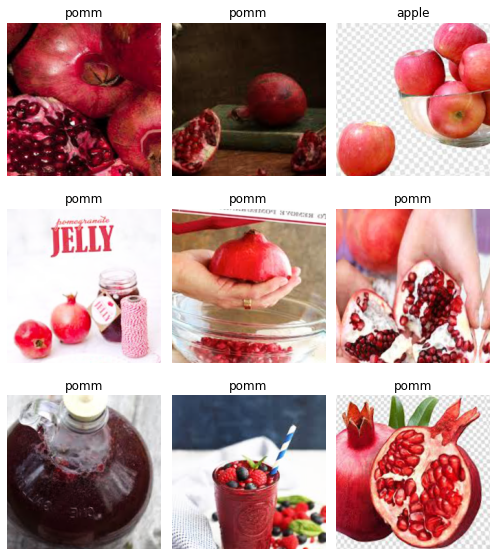

In [7]:
data.show_batch(rows=3, figsize=(7, 8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['apple', 'pomm', 'sample_data'], 3, 513, 128)

In [10]:
learn = create_cnn(data, models.resnet18, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.580879,1.052579,0.382812,0.617188,01:46
1,1.074247,0.340116,0.070312,0.929688,01:41
2,0.793434,0.356892,0.078125,0.921875,01:40
3,0.631919,0.341478,0.085938,0.914062,01:42
4,0.507064,0.333416,0.085938,0.914062,01:41


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

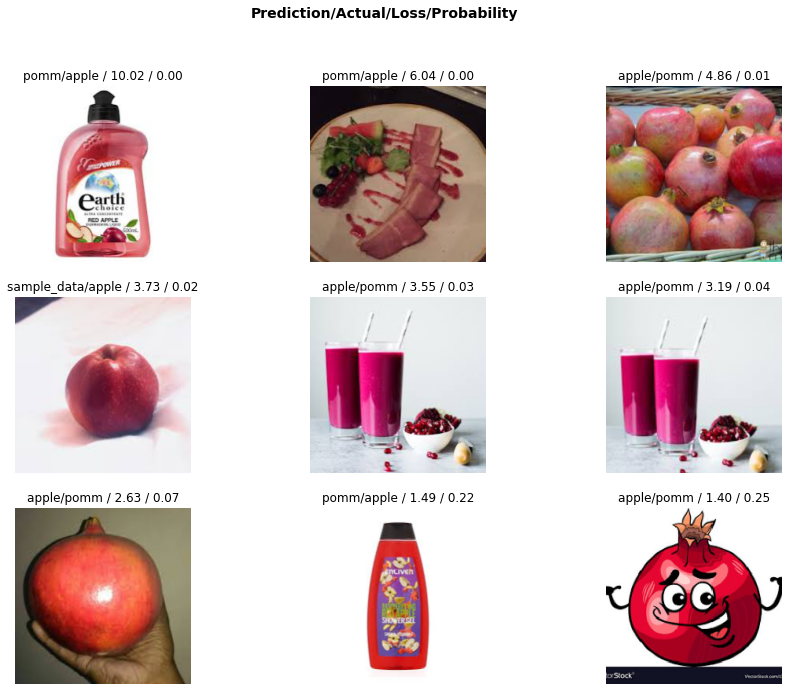

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
learn.export()

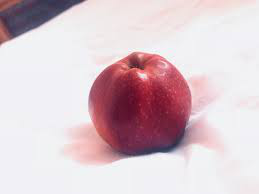

In [18]:
img = open_image(path/'test.jpeg')
img

In [0]:
learn = load_learner(path)

In [20]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(2)